# ***Parachute video analysis***
---
1. 動画情報確認
   * フレーム数確認
   * フレーム幅,高確認
1. 動画上のフレーム当たり秒数確認
   * 動画のフレーム率を確認し,フレーム当たり秒数を取り出す
1. 動画上のピクセル当たりの実長確認
   * 動画の一フレームを取り出し,フレームあたら実長を取り出す
1. 落下時間確認
   * 落下開始時刻(フレーム)確認
   * パラシュート展開時刻(フレーム)確認
   * 着地時刻(フレーム)確認
1. 落下軌跡確認
   * 動画上に点を取り,軌跡を求める
1. 時間-距離グラフ
   * xピクセル-yピクセル座標系
   * 時間[frame]-ピクセル座標系
   * 時間[s]-ピクセル座標系
   * 時間[s]-メートル座標系
1. 時間-速度グラフ
   * 時間-速度グラフ
   * 終端速度
      * 十分減速した時点から地面到達までの平均速度
1. 抗力係数を求める
   * F = ma
      * ma = mg -D
      * ma = mg - 0.5ρ(v^2)ACd


---
### 1. 動画情報確認
   * フレーム数確認
   * フレーム幅、高確認

In [1]:
import cv2
cap = cv2.VideoCapture('1st front.mp4')
i = 1

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    cv2.imshow('video',frame)

    if cv2.waitKey(1) == 27:
        break
    i+=1
    
print(f'フレーム高 : {cap.get(cv2.CAP_PROP_FRAME_HEIGHT)}\nフレーム幅 : {cap.get(cv2.CAP_PROP_FRAME_WIDTH)}')
cap.release()
cv2.destroyAllWindows()
print(f'総フレーム数 : {i}')

フレーム高 : 1080.0
フレーム幅 : 1920.0
総フレーム数 : 648


---
### 2. 動画上のフレーム当たり秒数確認
   * 動画のフレーム率を確認しフレーム当たり秒数を取り出す

In [1]:
frame_height = 1080
frame_width = 1920
frame_Total = 648
frame_per_s = 29.97

realtime = 648/29.97

print(f'{frame_per_s} = 1 [s]')
print(f'length of the video = {realtime}')
print(f'1frame = {1/29.97} [s]')

29.97 = 1 [s]
length of the video = 21.62162162162162
1frame = 0.033366700033366704 [s]


---
### 3. 動画上のピクセル当たりの実長確認
* 動画の一フレームを取り出し,フレームあたら実長を取り出す

In [3]:
import cv2
cap = cv2.VideoCapture('1st front.mp4')

top_coor = (940,146)
bottom_coor = (940,890)
coral_pink = (128,128,240)

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break
    
    cv2.line(frame,top_coor,top_coor,coral_pink,5,cv2.LINE_AA)
    cv2.line(frame,bottom_coor,bottom_coor,coral_pink,5,cv2.LINE_AA)
    # cv2.line(frame,top_coor,bottom_coor,coral_pink,1,cv2.LINE_AA)
    cv2.imshow('video',frame)

    if cv2.waitKey() == 27:
        break

cap.release()
cv2.destroyAllWindows()

print(f'|上端y座標 - 下端y座標| = |{top_coor[1]}-{bottom_coor[1]}| = {abs(top_coor[1] - bottom_coor[1])} [pixel] = 15.0 [m]')
print(f'1 [pixel] = {15.0/(abs(top_coor[1]-bottom_coor[1]))} [m]')

|上端y座標 - 下端y座標| = |146-890| = 744 [pixel] = 15.0 [m]
1 [pixel] = 0.020161290322580645 [m]


---
### 4. 落下時間確認
* 落下開始時刻(フレーム)確認
* パラシュート展開時刻(フレーム)確認
* 着地時刻(フレーム)確認　

In [1]:
import cv2

def pause(i,min,max):
    if min<=i<=max:
        if i == min:
            print(f'{i} frame')
        if cv2.waitKey() == ord('p'):
            pass

cap = cv2.VideoCapture('1st front.mp4')
i = 1

std_coor = [(820,146),(820,890),(923,146)]

coral_pink = (128,128,240)

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break
    cv2.line(frame,std_coor[0],std_coor[2],coral_pink,1,cv2.LINE_AA)
    cv2.line(frame,std_coor[0],std_coor[1],coral_pink,1,cv2.LINE_AA)

    cv2.imshow('video',frame)

    pause(i,409,409) # 落下開始
    pause(i,434,434) # パラシュート展開
    pause(i,477,477) # 地面到達

    if i > 600:
        break

    if cv2.waitKey(1) == 27:
      break
    i+=1

cap.release()
cv2.destroyAllWindows()

print("----------------------------------------\n上から\n1.落下開始\n2.パラシュート展開\n3.地面到達")
print(f"----------------------------------------\n滞空時間 : {477-409} [frame] ⇒ {(477-409)/29.97} [s]\nパラシュート展開 : {434-409} [frame] ⇒ {(434-409)/29.97} [s] 後")

409 frame
434 frame
477 frame
----------------------------------------
上から
1.落下開始
2.パラシュート展開
3.地面到達
----------------------------------------
滞空時間 : 68 [frame] ⇒ 2.2689356022689355 [s]
パラシュート展開 : 25 [frame] ⇒ 0.8341675008341676 [s] 後


---
### 5. 落下軌跡確認
* 動画上に点を取り、軌跡を求める

In [2]:
import cv2

def pause(i,min,max):
    if min<=i<=max:
        if cv2.waitKey() == ord('p'):
            pass

cap = cv2.VideoCapture('1st front.mp4')
i = 1

list = [(923,146),(923,151),(923,157),(923,164),(923,170),(923,178),(923,186),(923,194),(923,202),(923,213), # 409 ~ 418
        (923,222),(923,233),(925,242),(927,257),(930,266),(931,279),(932,291),(933,303),(934,315),(934,330), # 419 ~ 428
        (935,346),(936,359),(936,376),(938,390),(938,405),(938,420),(938,430),(938,441),(941,453),(941,465), # 429 ~ 438
        (942,478),(942,490),(940,502),(938,514),(936,526),(930,538),(928,549),(925,560),(920,571),(916,582), # 439 ~ 448
        (915,594),(912,604),(904,618),(900,629),(895,639),(892,650),(887,661),(882,672),(875,683),(872,691), # 449 ~ 458
        (866,701),(861,712),(852,723),(846,733),(842,743),(839,753),(833,761),(829,771),(828,782),(825,791), # 459 ~ 468
        (822,803),(821,814),(818,825),(817,834),(816,845),(815,856),(815,867),(814,879),(812,890)] # 469 ~ 477

top_coor = (820,146)
bottom_coor = (820,891)
col = (255,0,0)

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break

    if 409<= i <=477:
        for j in range(0,i-408):
            cv2.line(frame,list[j],list[j],col,3,cv2.LINE_AA)
            # print(j)

    cv2.imshow('video',frame)

    # pause(i,409,477)
    pause(i,477,477)

    if i > 478:
        break

    if i < 400:
        if cv2.waitKey(1) == 27:
            break
    else:
        cv2.waitKey(100)
    i+=1

cap.release()
cv2.destroyAllWindows()

---
### 6. 時間-距離グラフ

* xピクセル-yピクセル座標系

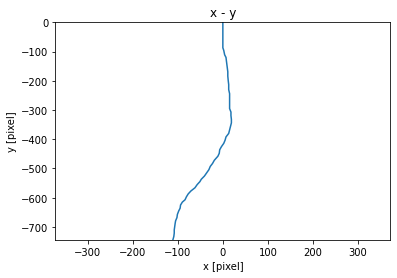

In [4]:
import matplotlib.pyplot as plt

list = [(923,146),(923,151),(923,157),(923,164),(923,170),(923,178),(923,186),(923,194),(923,202),(923,213), # 409 ~ 418
        (923,222),(923,233),(925,242),(927,257),(930,266),(931,279),(932,291),(933,303),(934,315),(934,330), # 419 ~ 428
        (935,346),(936,359),(936,376),(938,390),(938,405),(938,420),(938,430),(938,441),(941,453),(941,465), # 429 ~ 438
        (942,478),(942,490),(940,502),(938,514),(936,526),(930,538),(928,549),(925,560),(920,571),(916,582), # 439 ~ 448
        (915,594),(912,604),(904,618),(900,629),(895,639),(892,650),(887,661),(882,672),(875,683),(872,691), # 449 ~ 458
        (866,701),(861,712),(852,723),(846,733),(842,743),(839,753),(833,761),(829,771),(828,782),(825,791), # 459 ~ 468
        (822,803),(821,814),(818,825),(817,834),(816,845),(815,856),(815,867),(814,879),(812,890)] # 469 ~ 477
list_xp_a,list_yp_a = zip(*list)

list_xp =[]
list_yp =[]

for xf in list_xp_a:
    xp = xf - 923
    list_xp.append(xp)

for yf in list_yp_a:
    yp = 146-yf
    list_yp.append(yp)

plt.plot(list_xp,list_yp)
plt.title("x - y")
plt.xlabel("x [pixel]")
plt.ylabel("y [pixel]")
plt.xlim(-372,372)
plt.ylim(-744,0)
plt.show()

* 時間[frame]-ピクセル座標系作成

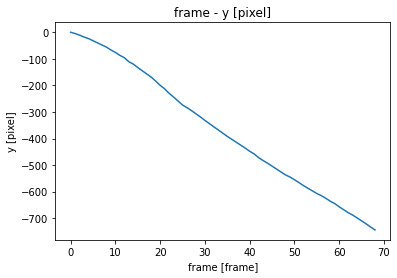

In [5]:
import matplotlib.pyplot as plt

list = [(923,146),(923,151),(923,157),(923,164),(923,170),(923,178),(923,186),(923,194),(923,202),(923,213), # 409 ~ 418
        (923,222),(923,233),(925,242),(927,257),(930,266),(931,279),(932,291),(933,303),(934,315),(934,330), # 419 ~ 428
        (935,346),(936,359),(936,376),(938,390),(938,405),(938,420),(938,430),(938,441),(941,453),(941,465), # 429 ~ 438
        (942,478),(942,490),(940,502),(938,514),(936,526),(930,538),(928,549),(925,560),(920,571),(916,582), # 439 ~ 448
        (915,594),(912,604),(904,618),(900,629),(895,639),(892,650),(887,661),(882,672),(875,683),(872,691), # 449 ~ 458
        (866,701),(861,712),(852,723),(846,733),(842,743),(839,753),(833,761),(829,771),(828,782),(825,791), # 459 ~ 468
        (822,803),(821,814),(818,825),(817,834),(816,845),(815,856),(815,867),(814,879),(812,890)] # 469 ~ 477
list_xp_a,list_yp_a = zip(*list)

list_yp =[]

for yp in list_yp_a:
    yp = 146-yp
    list_yp.append(yp)

list_f=[]

for frame,yp in enumerate(list_yp):
    list_f.append(frame)

plt.plot(list_f,list_yp)
plt.title("frame - y [pixel]")
plt.xlabel("frame [frame]")
plt.ylabel("y [pixel]")
plt.show()

* 時間[s]-ピクセル座標系

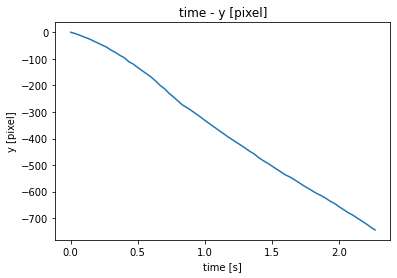

In [6]:
import matplotlib.pyplot as plt

list = [(923,146),(923,151),(923,157),(923,164),(923,170),(923,178),(923,186),(923,194),(923,202),(923,213), # 409 ~ 418
        (923,222),(923,233),(925,242),(927,257),(930,266),(931,279),(932,291),(933,303),(934,315),(934,330), # 419 ~ 428
        (935,346),(936,359),(936,376),(938,390),(938,405),(938,420),(938,430),(938,441),(941,453),(941,465), # 429 ~ 438
        (942,478),(942,490),(940,502),(938,514),(936,526),(930,538),(928,549),(925,560),(920,571),(916,582), # 439 ~ 448
        (915,594),(912,604),(904,618),(900,629),(895,639),(892,650),(887,661),(882,672),(875,683),(872,691), # 449 ~ 458
        (866,701),(861,712),(852,723),(846,733),(842,743),(839,753),(833,761),(829,771),(828,782),(825,791), # 459 ~ 468
        (822,803),(821,814),(818,825),(817,834),(816,845),(815,856),(815,867),(814,879),(812,890)] # 469 ~ 477
list_xp_a,list_yp_a = zip(*list)

list_yp =[]

for yp in list_yp_a:
    yp = 146-yp
    list_yp.append(yp)

list_f=[]

for frame,yp in enumerate(list_yp):
    list_f.append(frame)

list_t=[]

for t in list_f:
    t = t * 0.033366700033366704
    list_t.append(t)

plt.plot(list_t,list_yp)
plt.title("time - y [pixel]")
plt.xlabel("time [s]")
plt.ylabel("y [pixel]")
plt.show()

* 時間[s]-メートル座標系

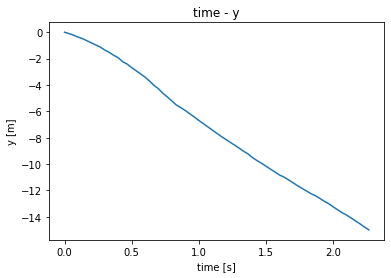

In [7]:
import matplotlib.pyplot as plt

list = [(923,146),(923,151),(923,157),(923,164),(923,170),(923,178),(923,186),(923,194),(923,202),(923,213), # 409 ~ 418
        (923,222),(923,233),(925,242),(927,257),(930,266),(931,279),(932,291),(933,303),(934,315),(934,330), # 419 ~ 428
        (935,346),(936,359),(936,376),(938,390),(938,405),(938,420),(938,430),(938,441),(941,453),(941,465), # 429 ~ 438
        (942,478),(942,490),(940,502),(938,514),(936,526),(930,538),(928,549),(925,560),(920,571),(916,582), # 439 ~ 448
        (915,594),(912,604),(904,618),(900,629),(895,639),(892,650),(887,661),(882,672),(875,683),(872,691), # 449 ~ 458
        (866,701),(861,712),(852,723),(846,733),(842,743),(839,753),(833,761),(829,771),(828,782),(825,791), # 459 ~ 468
        (822,803),(821,814),(818,825),(817,834),(816,845),(815,856),(815,867),(814,879),(812,890)] # 469 ~ 477
list_xp_a,list_yp_a = zip(*list)

list_yp =[]

for yp in list_yp_a:
    yp = 146-yp
    list_yp.append(yp)

list_f=[]

for frame,yp in enumerate(list_yp):
    list_f.append(frame)

list_t=[]

for t in list_f:
    t = t * 0.033366700033366704
    list_t.append(t)

list_y =[]

for y in list_yp:
    y = y *0.020161290322580645
    list_y.append(y)

plt.plot(list_t,list_y)
plt.title("time - y")
plt.xlabel("time [s]")
plt.ylabel("y [m]")
plt.show()

### 7. 時間-速度グラフ

* 時間-速度グラフ

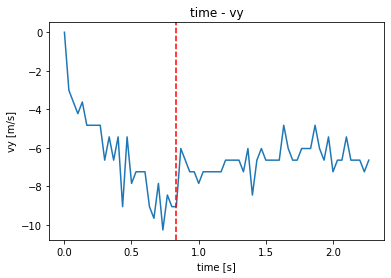

In [10]:
import matplotlib.pyplot as plt

list = [(923,146),(923,151),(923,157),(923,164),(923,170),(923,178),(923,186),(923,194),(923,202),(923,213), # 409 ~ 418
        (923,222),(923,233),(925,242),(927,257),(930,266),(931,279),(932,291),(933,303),(934,315),(934,330), # 419 ~ 428
        (935,346),(936,359),(936,376),(938,390),(938,405),(938,420),(938,430),(938,441),(941,453),(941,465), # 429 ~ 438
        (942,478),(942,490),(940,502),(938,514),(936,526),(930,538),(928,549),(925,560),(920,571),(916,582), # 439 ~ 448
        (915,594),(912,604),(904,618),(900,629),(895,639),(892,650),(887,661),(882,672),(875,683),(872,691), # 449 ~ 458
        (866,701),(861,712),(852,723),(846,733),(842,743),(839,753),(833,761),(829,771),(828,782),(825,791), # 459 ~ 468
        (822,803),(821,814),(818,825),(817,834),(816,845),(815,856),(815,867),(814,879),(812,890)] # 469 ~ 477
list_xp_a,list_yp_a = zip(*list)

list_yp =[]

for yp in list_yp_a:
    yp = 146-yp
    list_yp.append(yp)

list_f=[]

for frame,yp in enumerate(list_yp):
    list_f.append(frame)

list_t=[]

for t in list_f:
    t = t * 0.033366700033366704
    list_t.append(t)

list_dyp =[0]
for i,yp in enumerate(list_yp):
    try:
        dyp = list_yp[i+1] - list_yp[i]
        list_dyp.append(dyp)
    except:
        pass

list_dy =[]

for dyp in list_dyp:
    dy = dyp * 0.020161290322580645
    list_dy.append(dy)

list_vy =[]

for dy in list_dy:
    vy = dy / 0.033366700033366704
    list_vy.append(vy)


para = [(0.8341675008341676,0),(0.8341675008341676,-10)]
plt.plot(list_t,list_vy)
plt.axvline(x=0.8341675008341676,color='r',linestyle='--')
plt.title("time - vy")
plt.xlabel("time [s]")
plt.ylabel("vy [m/s]")
plt.show()

* 表

In [11]:
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

list = [(923,146),(923,151),(923,157),(923,164),(923,170),(923,178),(923,186),(923,194),(923,202),(923,213), # 409 ~ 418
        (923,222),(923,233),(925,242),(927,257),(930,266),(931,279),(932,291),(933,303),(934,315),(934,330), # 419 ~ 428
        (935,346),(936,359),(936,376),(938,390),(938,405),(938,420),(938,430),(938,441),(941,453),(941,465), # 429 ~ 438
        (942,478),(942,490),(940,502),(938,514),(936,526),(930,538),(928,549),(925,560),(920,571),(916,582), # 439 ~ 448
        (915,594),(912,604),(904,618),(900,629),(895,639),(892,650),(887,661),(882,672),(875,683),(872,691), # 449 ~ 458
        (866,701),(861,712),(852,723),(846,733),(842,743),(839,753),(833,761),(829,771),(828,782),(825,791), # 459 ~ 468
        (822,803),(821,814),(818,825),(817,834),(816,845),(815,856),(815,867),(814,879),(812,890)] # 469 ~ 477
list_xp_a,list_yp_a = zip(*list)

list_yp =[]

for yp in list_yp_a:
    yp = 146-yp
    list_yp.append(yp)

list_f=[]

for frame,yp in enumerate(list_yp):
    list_f.append(frame)

list_t=[]

for t in list_f:
    t = t * 0.033366700033366704
    list_t.append(t)

list_dyp =[0]
for i,yp in enumerate(list_yp):
    try:
        dyp = list_yp[i+1] - list_yp[i]
        list_dyp.append(dyp)
    except:
        pass

list_dy =[]

for dyp in list_dyp:
    dy = dyp * 0.020161290322580645
    list_dy.append(dy)

list_vy =[]

for dy in list_dy:
    vy = dy / 0.033366700033366704
    list_vy.append(vy)

data = {
    't' : [],
    'y' : [],
    'vy' : [],
}

for i in range(0,69):
    data['t'].append(list_t[i])
    data['y'].append(list_y[i])
    data['vy'].append(list_vy[i])

df = pd.DataFrame(data)
df.set_index('t')

,y,vy
t,,
0.000000,0.000000,0.000000
0.033367,-0.100806,-3.021169
0.066733,-0.221774,-3.625403
0.100100,-0.362903,-4.229637
0.133467,-0.483871,-3.625403
0.166834,-0.645161,-4.833871
0.200200,-0.806452,-4.833871
0.233567,-0.967742,-4.833871
0.266934,-1.129032,-4.833871


* 終端速度
   * 十分減速した時点から地面到達までの平均速度

In [12]:
import matplotlib.pyplot as plt

list = [(923,146),(923,151),(923,157),(923,164),(923,170),(923,178),(923,186),(923,194),(923,202),(923,213), # 409 ~ 418
        (923,222),(923,233),(925,242),(927,257),(930,266),(931,279),(932,291),(933,303),(934,315),(934,330), # 419 ~ 428
        (935,346),(936,359),(936,376),(938,390),(938,405),(938,420),(938,430),(938,441),(941,453),(941,465), # 429 ~ 438
        (942,478),(942,490),(940,502),(938,514),(936,526),(930,538),(928,549),(925,560),(920,571),(916,582), # 439 ~ 448
        (915,594),(912,604),(904,618),(900,629),(895,639),(892,650),(887,661),(882,672),(875,683),(872,691), # 449 ~ 458
        (866,701),(861,712),(852,723),(846,733),(842,743),(839,753),(833,761),(829,771),(828,782),(825,791), # 459 ~ 468
        (822,803),(821,814),(818,825),(817,834),(816,845),(815,856),(815,867),(814,879),(812,890)] # 469 ~ 477
list_xp_a,list_yp_a = zip(*list)

list_yp =[]

for yp in list_yp_a:
    yp = 146-yp
    list_yp.append(yp)

list_f=[]

for frame,yp in enumerate(list_yp):
    list_f.append(frame)

list_t=[]

for t in list_f:
    t = t * 0.033366700033366704
    list_t.append(t)

list_dyp =[0]
for i,yp in enumerate(list_yp):
    try:
        dyp = list_yp[i+1] - list_yp[i]
        list_dyp.append(dyp)
    except:
        pass

list_dy =[]

for dyp in list_dyp:
    dy = dyp * 0.020161290322580645
    list_dy.append(dy)

list_vy =[]

for dy in list_dy:
    vy = dy / 0.033366700033366704
    list_vy.append(vy)

index = 0
sum_vy = 0
for i in range(45,69):
        sum_vy += list_vy[i]
        index+=1
print(f'1.5[s]から地面到達までの平均速度 : {sum_vy/(index-1)} [m/s]')

1.5[s]から地面到達までの平均速度 : -6.594030504908836 [m/s]


---
### 8. 抗力係数を求める
   * F = ma
      * ma = mg -D
      * ma = mg - 0.5ρ(v^2)ACd

In [13]:
m = 1.306 # [kg]
rho = 1.166 # 20℃における空気密度 [kg/m^3]
A = 0.4693 # パラシュート投影面積 [m^2]
g = 9.81 # 重力加速度
m = 1.306 # 機体質量 [kg]
h = 15.0 # 落下支点高さ [m]
Vwind = 0.0 # 風(Vwind,0,0)

# mg = D
# mg = 0.5 * rho * (-6.594)^2 * A * Cd
# 2 * m * g / rho / (-6.594)^2 / A = Cd

Cd = 2 * m * g / rho / ((-6.594)**2) / A

print(f'抗力係数 : {Cd}')

抗力係数 : 1.0769491299374168
